## Assignment 2

A child has available a certain number of ice cream scoops every day, 's'. The child can store a number of scoops for the next day 'a' and eat the remainder scoops c = s − a. The number of scoops available the next day, s′, is equal to the number of scoops stored over night, a, plus an additional scoops provided by the parents, e. The number of scoops available the next day is given by:

s' = a + e'

s' = (s-c) + e'

e' must be known after the decision "a" is made. 

The child can store up to 2 scoops in the fridge every day which implies that a ∈ {0, 1, 2}, s ∈ {0, 1, 2, 3, 4} & e
∈ {0,1,2}.



In [1]:
import pandas as pd
pd.set_option('display.max_rows', 36)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 1000)
import numpy as np
import quantecon as qe
import matplotlib.pyplot as plt

#### Question 1: Construct the transition probability from (s, e) to (s′, e′) for each action a ∈ {0, 1, 2}.

Define transition probability matrix for e.

In [2]:
Pt_e = np.array(
            [[0.8, 0.1, 0.1],
               [0.01, 0.98, 0.01],
               [0.1, 0.1, 0.8]])

In [3]:
Pt_e

array([[0.8 , 0.1 , 0.1 ],
       [0.01, 0.98, 0.01],
       [0.1 , 0.1 , 0.8 ]])

Initiialize transition probability matrix for (s, e) (15 x15).

In [4]:
col_name = []
for s in range(5):
    for e in range(3):
        col_name.append((s,e))

In [5]:
col_name #(s, e)

[(0, 0),
 (0, 1),
 (0, 2),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, 0),
 (2, 1),
 (2, 2),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2)]

In [6]:
Pt_se = np.empty((15,15))
Pt_se[:] = np.nan
Pt_se_df = pd.DataFrame(Pt_se, columns=col_name, index=col_name)

In [7]:
Pt_se_df

,"(0, 0)","(0, 1)","(0, 2)","(1, 0)","(1, 1)","(1, 2)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(0, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Given that with e cannot be larger than s as $s = s(t=t-1) + e$, therefore, probability on transitioning from $(s,e)$ where $s < e$ should be 0. i.e. these should not be a reachable state.

Looping through $(s, e)$ and $(s', e')$ to drop off rows and columns with 0 probability to reduce the state space.

In [8]:
for (s,e) in col_name:
    if s < e:
        Pt_se_df.drop([(s,e)],inplace=True)
for(s_,e_) in col_name: 
    if s_ < e_:
        Pt_se_df.drop(columns=[(s_,e_)], inplace=True)      

col_name = list(Pt_se_df)

In [9]:
Pt_se_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Create 3 copies of the transition probability matrix for each action, $a$.

In [10]:
Pt_se_df_0 = Pt_se_df.copy()
Pt_se_df_1 = Pt_se_df.copy()
Pt_se_df_2 = Pt_se_df.copy()

For $a = 0,$ given that with $a = 0$, $s'$ must be equal to $e'$, therefore, probability on transitioning to $(s',e')$ where $s' != e'$ should be 0.


In [11]:
# looping through (s', e') columns

for (s_,e_) in col_name: # s_ and e_ corresponds to columns
    if s_ != e_:
        Pt_se_df_0.loc[:, (s_,e_)] = 0

        
# transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix e
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if Pt_se_df_0.at[(s,e), (s_,e_)] != 0:
            Pt_se_df_0.at[(s,e), (s_,e_)] = Pt_e[e,e_]

In [12]:
Pt_se_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(1, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(1, 1)",0.01,0,0.98,0,0,0.01,0,0,0,0,0,0
"(2, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(2, 1)",0.01,0,0.98,0,0,0.01,0,0,0,0,0,0
"(2, 2)",0.10,0,0.10,0,0,0.80,0,0,0,0,0,0
"(3, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(3, 1)",0.01,0,0.98,0,0,0.01,0,0,0,0,0,0
"(3, 2)",0.10,0,0.10,0,0,0.80,0,0,0,0,0,0
"(4, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0


For $a = 1,$ given that with $a = 1$, $s'$ must be equal to $e'$, therefore, probability on transitioning to $(s',e')$ where $s' != e' + 1$ should be 0.


In [13]:
#looping through (s', e')
for (s_,e_) in col_name:
    if s_ != e_ + 1:
        Pt_se_df_1.loc[:, (s_,e_)] = 0
        
# Transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix e
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if Pt_se_df_1.at[(s,e), (s_,e_)] != 0:
            Pt_se_df_1.at[(s,e), (s_,e_)] = Pt_e[e,e_]


In [14]:
Pt_se_df_1

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0,0.80,0,0,0.10,0,0,0,0.10,0,0,0
"(1, 0)",0,0.80,0,0,0.10,0,0,0,0.10,0,0,0
"(1, 1)",0,0.01,0,0,0.98,0,0,0,0.01,0,0,0
"(2, 0)",0,0.80,0,0,0.10,0,0,0,0.10,0,0,0
"(2, 1)",0,0.01,0,0,0.98,0,0,0,0.01,0,0,0
"(2, 2)",0,0.10,0,0,0.10,0,0,0,0.80,0,0,0
"(3, 0)",0,0.80,0,0,0.10,0,0,0,0.10,0,0,0
"(3, 1)",0,0.01,0,0,0.98,0,0,0,0.01,0,0,0
"(3, 2)",0,0.10,0,0,0.10,0,0,0,0.80,0,0,0
"(4, 0)",0,0.80,0,0,0.10,0,0,0,0.10,0,0,0


For $a = 2,$ given that with $a = 1$, $s'$ must be equal to $e'$, therefore, probability on transitioning to $(s',e')$ where $s' != e' + 2$ should be 0.

In [15]:
#looping through (s', e')
for (s_,e_) in col_name:
    if s_ != e_ + 2:
        Pt_se_df_2.loc[:, (s_,e_)] = 0
        
# Transitioning from (s,e) to (s',e') should now only be dependent on transition probability matrix e
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if Pt_se_df_2.at[(s,e), (s_,e_)] != 0:
            Pt_se_df_2.at[(s,e), (s_,e_)] = Pt_e[e,e_]

In [16]:
Pt_se_df_2

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0,0,0,0.80,0,0,0,0.10,0,0,0,0.10
"(1, 0)",0,0,0,0.80,0,0,0,0.10,0,0,0,0.10
"(1, 1)",0,0,0,0.01,0,0,0,0.98,0,0,0,0.01
"(2, 0)",0,0,0,0.80,0,0,0,0.10,0,0,0,0.10
"(2, 1)",0,0,0,0.01,0,0,0,0.98,0,0,0,0.01
"(2, 2)",0,0,0,0.10,0,0,0,0.10,0,0,0,0.80
"(3, 0)",0,0,0,0.80,0,0,0,0.10,0,0,0,0.10
"(3, 1)",0,0,0,0.01,0,0,0,0.98,0,0,0,0.01
"(3, 2)",0,0,0,0.10,0,0,0,0.10,0,0,0,0.80
"(4, 0)",0,0,0,0.80,0,0,0,0.10,0,0,0,0.10


#### Question 2: The child subjected utility from eating ice cream is log( c + 1) if c ≥ 0 and −∞ otherwise. Construct the reward matrix for each transition (s, e, a) and (s′, e′).

Define the reward function

In [17]:
def reward(c):
    if c >= 0:
        return np.log(c + 1)
    else:
        return -100000000000000000000000000000

In [18]:
reward_row = []
for a in range(3):
    for (s,e) in col_name:
        reward_row.append((s,e,a))

In [19]:
reward_row

[(0, 0, 0),
 (1, 0, 0),
 (1, 1, 0),
 (2, 0, 0),
 (2, 1, 0),
 (2, 2, 0),
 (3, 0, 0),
 (3, 1, 0),
 (3, 2, 0),
 (4, 0, 0),
 (4, 1, 0),
 (4, 2, 0),
 (0, 0, 1),
 (1, 0, 1),
 (1, 1, 1),
 (2, 0, 1),
 (2, 1, 1),
 (2, 2, 1),
 (3, 0, 1),
 (3, 1, 1),
 (3, 2, 1),
 (4, 0, 1),
 (4, 1, 1),
 (4, 2, 1),
 (0, 0, 2),
 (1, 0, 2),
 (1, 1, 2),
 (2, 0, 2),
 (2, 1, 2),
 (2, 2, 2),
 (3, 0, 2),
 (3, 1, 2),
 (3, 2, 2),
 (4, 0, 2),
 (4, 1, 2),
 (4, 2, 2)]

In [20]:
R_sea = np.empty((len(reward_row),len(col_name)))
R_sea[:] = np.nan
R_sea_df = pd.DataFrame(R_sea, columns=col_name, index=reward_row)

In [21]:
R_sea_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 1, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 1, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 2, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 1, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 2, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, 0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#reward is dependent on availability of ice cream, s, at the initial state
for (s,e,a) in reward_row:
    c = s - a
    R_sea_df.loc[(s,e,a),:] = reward(c)

In [23]:
R_sea_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0, 0)",0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
"(1, 0, 0)",6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01
"(1, 1, 0)",6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01,6.931472e-01
"(2, 0, 0)",1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00
"(2, 1, 0)",1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00
"(2, 2, 0)",1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00,1.098612e+00
"(3, 0, 0)",1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00
"(3, 1, 0)",1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00
"(3, 2, 0)",1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00,1.386294e+00
"(4, 0, 0)",1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00,1.609438e+00


In [24]:
R_se_df_0 = Pt_se_df.copy()
R_se_df_1 = Pt_se_df.copy()
R_se_df_2 = Pt_se_df.copy()

In [25]:
#reward matrix for a = 0 i.e. eating all the ice cream (s = c)
a = 0
for (s,e) in col_name:
    c = s - a
    R_se_df_0.loc[(s,e),:] = reward(c)
      
a = 1
for (s,e) in col_name:
    c = s - a
    R_se_df_1.loc[(s,e),:] = reward(c)

a = 2
for (s,e) in col_name:
    c = s - a
    R_se_df_2.loc[(s,e),:] = reward(c)

In [26]:
R_se_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(1, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(2, 1)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(2, 2)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612
"(3, 0)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
"(3, 1)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
"(3, 2)",1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294,1.386294
"(4, 0)",1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438,1.609438


#### Question 3: Apply the value iteration approach to compute the value function for each state and optimal policy. Iterate 600 times.

In [27]:
P = np.array([Pt_se_df_0, Pt_se_df_1, Pt_se_df_2],dtype=float)

K,N,M = P.shape

In [28]:
RR = np.array([R_se_df_0, R_se_df_1, R_se_df_2],dtype=float)

In [29]:
RR.shape

(3, 12, 12)

In [30]:
q = np.zeros((K,N,1),dtype=np.float64) 
for i in range(0,N):
    for k in range(0,K):
        for j in range(0,M):
            q[k,i,0] = q[k,i,0] + RR[k,i,j]*P[k,i,j]

In [31]:
T=600
v = np.zeros((N,T),dtype=np.float64)
d = np.zeros((N,T),dtype=np.float64)
for n in range(1,T):
    for i in range(0,N):
        rhs = np.zeros((1,K),dtype=np.float64)
        for k in range(0,K):
            rhs[0][k] = q[k][i][0] + np.matmul(P[k,i,:],v[:,n-1]) 
        v[i,n] = max(rhs[0])
        d[i,n] = np.argmax(rhs[0])
v = v.T
d = d.T

In [32]:
value_df = pd.DataFrame(v, columns=col_name)

In [33]:
value_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.693147,0.693147,1.098612,1.098612,1.098612,1.386294,1.386294,1.386294,1.609438,1.609438,1.609438
2,0.179176,0.872323,1.383418,1.496156,1.790582,2.046817,1.901621,2.196047,2.386824,2.277075,2.484261,2.674506
3,0.486364,1.179511,2.071156,1.808746,2.480509,2.892325,2.377127,2.886980,3.274362,2.782592,3.292445,3.607437
4,0.885439,1.578587,2.756667,2.212243,3.168584,3.678639,2.789586,3.576549,4.084104,3.195051,3.982014,4.454135
...,...,...,...,...,...,...,...,...,...,...,...,...
595,399.037835,399.730982,401.879913,400.386605,402.447979,402.950033,401.004704,402.978522,403.393021,401.410170,403.383987,403.798487
596,399.713262,400.406410,402.555340,401.062033,403.123407,403.625460,401.680132,403.653949,404.068449,402.085597,404.059414,404.473914
597,400.388690,401.081837,403.230768,401.737460,403.798834,404.300888,402.355560,404.329377,404.743877,402.761025,404.734842,405.149342
598,401.064118,401.757265,403.906196,402.412888,404.474262,404.976316,403.030987,405.004805,405.419304,403.436452,405.410270,405.824769


In [34]:
policy_df = pd.DataFrame(d, columns=col_name)

In [35]:
policy_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0
3,0.0,0.0,0.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0
4,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
596,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
597,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0
598,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0


#### Question 4: For each e, plot the value function v(s, e) with s on the x-axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.) (Long run)

In [36]:
v_e0 = []
v_e1 = []
v_e2 = []
for (s,e) in col_name:
    if e == 0:
        v_e0.append((s, value_df.at[599,(s,e)]))
    if e == 1:
        v_e1.append((s, value_df.at[599,(s,e)]))
    if e == 2:
        v_e2.append((s, value_df.at[599,(s,e)]))

In [38]:
s_e0, v_e0 = zip(*v_e0)
s_e1, v_e1 = zip(*v_e1)
s_e2, v_e2 = zip(*v_e2)

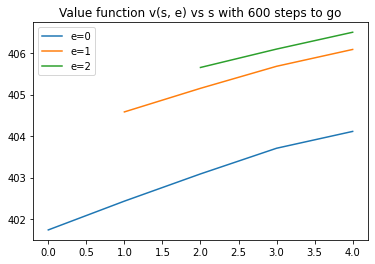

In [39]:
plt.plot(s_e0, v_e0, label='e=0')
plt.plot(s_e1, v_e1, label='e=1')
plt.plot(s_e2, v_e2, label='e=2')
plt.legend()
plt.title('Value function v(s, e) vs s with 600 steps to go')
plt.show()


#### Question 5: For each e, plot the optimal policy for storing ice cream scoops a(s, e) with s on the x- axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [40]:
a_e0 = []
a_e1 = []
a_e2 = []
for (s,e) in col_name:
    if e == 0:
        a_e0.append((s, policy_df.at[599,(s,e)]))
    if e == 1:
        a_e1.append((s, policy_df.at[599,(s,e)]))
    if e == 2:
        a_e2.append((s, policy_df.at[599,(s,e)]))

In [41]:
s_e0, a_e0 = zip(*a_e0)
s_e1, a_e1 = zip(*a_e1)
s_e2, a_e2 = zip(*a_e2)

In [42]:
#plt.plot(s_e0, a_e0, label='e=0', linestyle='dashdot', lw= 2)
#plt.plot(s_e1, a_e1, label='e=1', linestyle='dashed', lw= 3)
#plt.plot(s_e2, a_e2, label='e=2', linestyle='dotted', lw= 4)
#plt.legend()
#plt.title('Optimal Policy a(s, e) vs s with 600 steps remaining')
#plt.show()


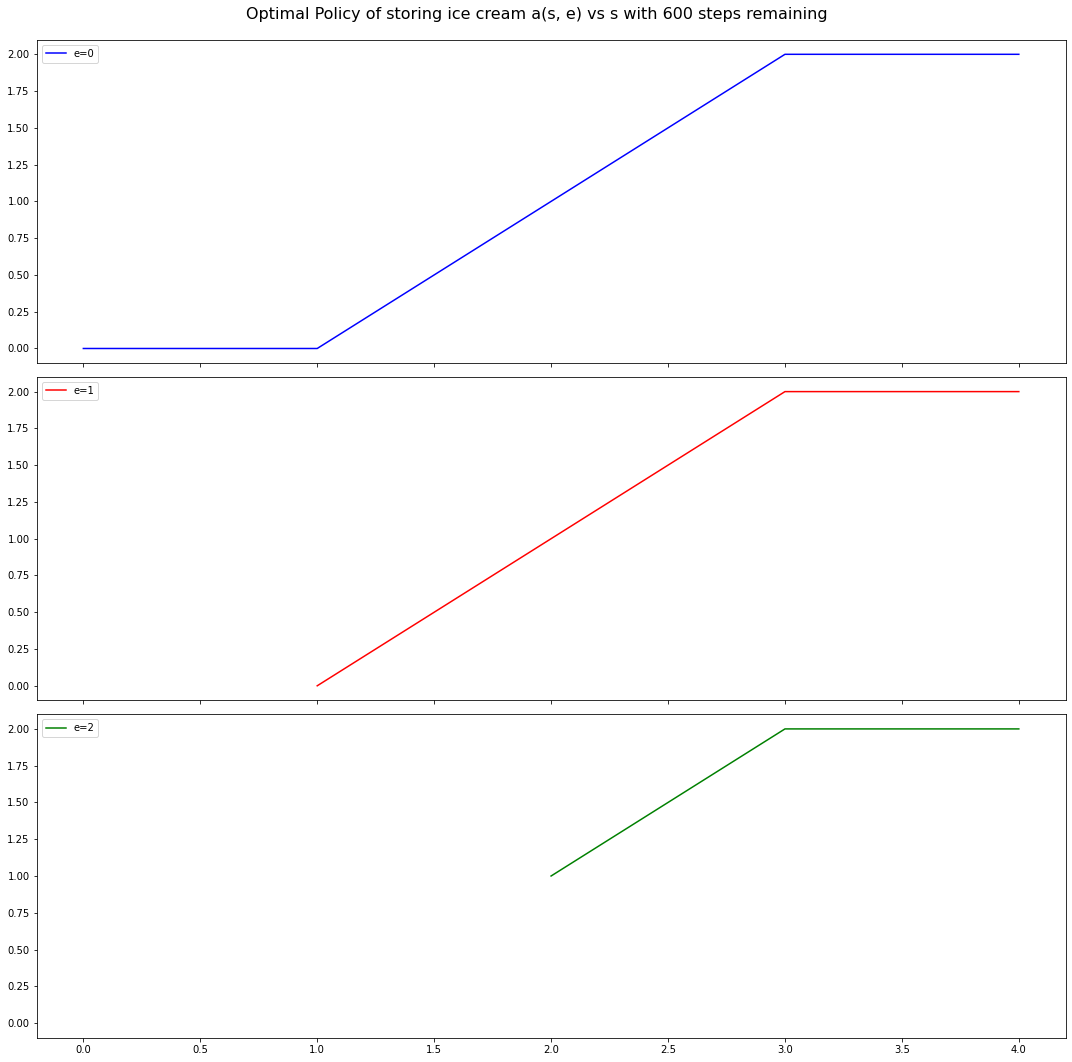

In [43]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, sharey=True)
fig.tight_layout()

ax[0].plot(s_e0, a_e0, label='e=0', color='b')
ax[0].legend()
ax[1].plot(s_e1, a_e1, label='e=1', color='r')
ax[1].legend()
ax[2].plot(s_e2, a_e2, label='e=2', color='g')
ax[2].legend()

fig.suptitle('Optimal Policy of storing ice cream a(s, e) vs s with 600 steps remaining', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

#### Question 6: For each e, plot the optimal policy for consuming ice cream scoops c(s, e) with s on the x-axis. (hint: there should be 3 lines plots, one for each e ∈ {0, 1, 2}.)

In [44]:
c_e0 = []
c_e1 = []
c_e2 = []
for (s,e) in col_name:
    if e == 0:
        c_e0.append((s, s - policy_df.at[599,(s,e)]))
    if e == 1:
        c_e1.append((s, s - policy_df.at[599,(s,e)]))
    if e == 2:
        c_e2.append((s, s - policy_df.at[599,(s,e)]))

In [45]:
s_e0, c_e0 = zip(*c_e0)
s_e1, c_e1 = zip(*c_e1)
s_e2, c_e2 = zip(*c_e2)

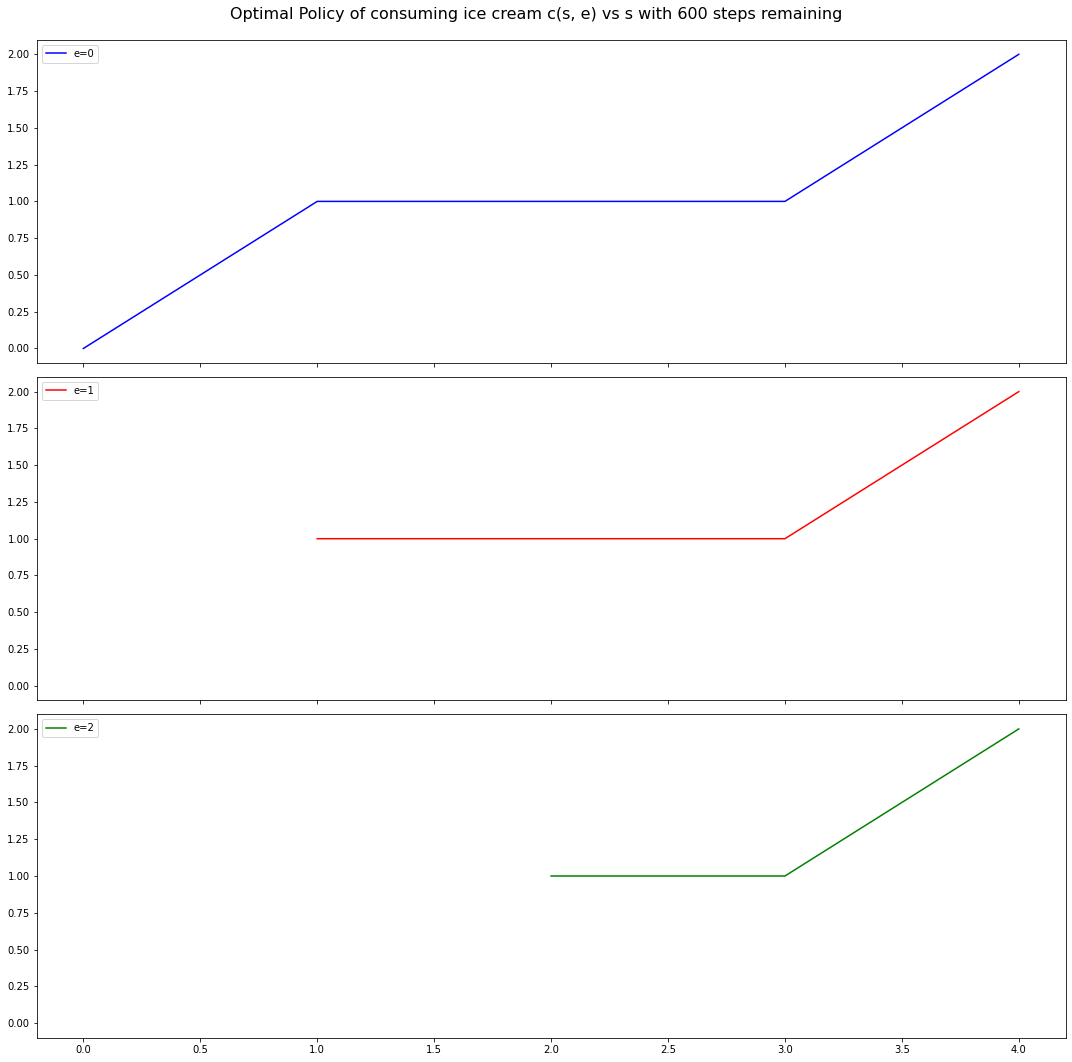

In [46]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15), sharex=True, sharey=True)
fig.tight_layout()

ax[0].plot(s_e0, c_e0, label='e=0', color='b')
ax[0].legend()
ax[1].plot(s_e1, c_e1, label='e=1', color='r')
ax[1].legend()
ax[2].plot(s_e2, c_e2, label='e=2', color='g')
ax[2].legend()

fig.suptitle('Optimal Policy of consuming ice cream c(s, e) vs s with 600 steps remaining', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

#### Question 7: Simulate a sequence of  e and set an initial value for s. Given the optimal policy, calculate and plot the evolution of a, c, and s over time.


In [71]:
#T = 600
np.random.seed(0)
s0 = np.random.randint(5,size=1)[0]
e0 = np.random.randint(3,size=1)[0]

e_mkv = qe.MarkovChain(Pt_e, (0,1,2))
e_sim=e_mkv.simulate(T, init=e0,random_state=73)

In [72]:
e_sim

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [48]:
#construct 4x600 array to save the value
evolution_seac = np.empty((T, 4)) #s, e, a, c, respectively

s = s0

for i in range(T):
    e = e_sim[i]
    print('Remaining Steps: {}'.format(T-1-i))
    print('Number of Scoops: {}'.format(s))
    print('Number of Scoops Given: {}'.format(e))
    a = int(policy_df.at[T-1-i, (s, e)])
    print('Ice Crean Saved: {}'.format(a))
    c = s - a
    print('Ice Cream Consumed: {}'.format(c))
    evolution_seac[i, :] = [s, e, a, c]
    print('State & Action: {}'.format([s, e, a, c]))
    
    #update s to s'
    if i != T - 1:
        s = int(a + e_sim[i+1])
    print('\n')

Remaining Steps: 599
Number of Scoops: 4
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 2
State & Action: [4, 1, 2, 2]


Remaining Steps: 598
Number of Scoops: 3
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 1
State & Action: [3, 1, 2, 1]


Remaining Steps: 597
Number of Scoops: 3
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 1
State & Action: [3, 1, 2, 1]


Remaining Steps: 596
Number of Scoops: 3
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 1
State & Action: [3, 1, 2, 1]


Remaining Steps: 595
Number of Scoops: 3
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 1
State & Action: [3, 1, 2, 1]


Remaining Steps: 594
Number of Scoops: 3
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 1
State & Action: [3, 1, 2, 1]


Remaining Steps: 593
Number of Scoops: 3
Number of Scoops Given: 1
Ice Crean Saved: 2
Ice Cream Consumed: 1
State & Action: [3, 1, 2, 1]


Remaining Steps: 592
Number

In [49]:
evolution_seac

array([[4., 1., 2., 2.],
       [3., 1., 2., 1.],
       [3., 1., 2., 1.],
       ...,
       [2., 1., 1., 1.],
       [2., 1., 0., 2.],
       [1., 1., 0., 1.]])

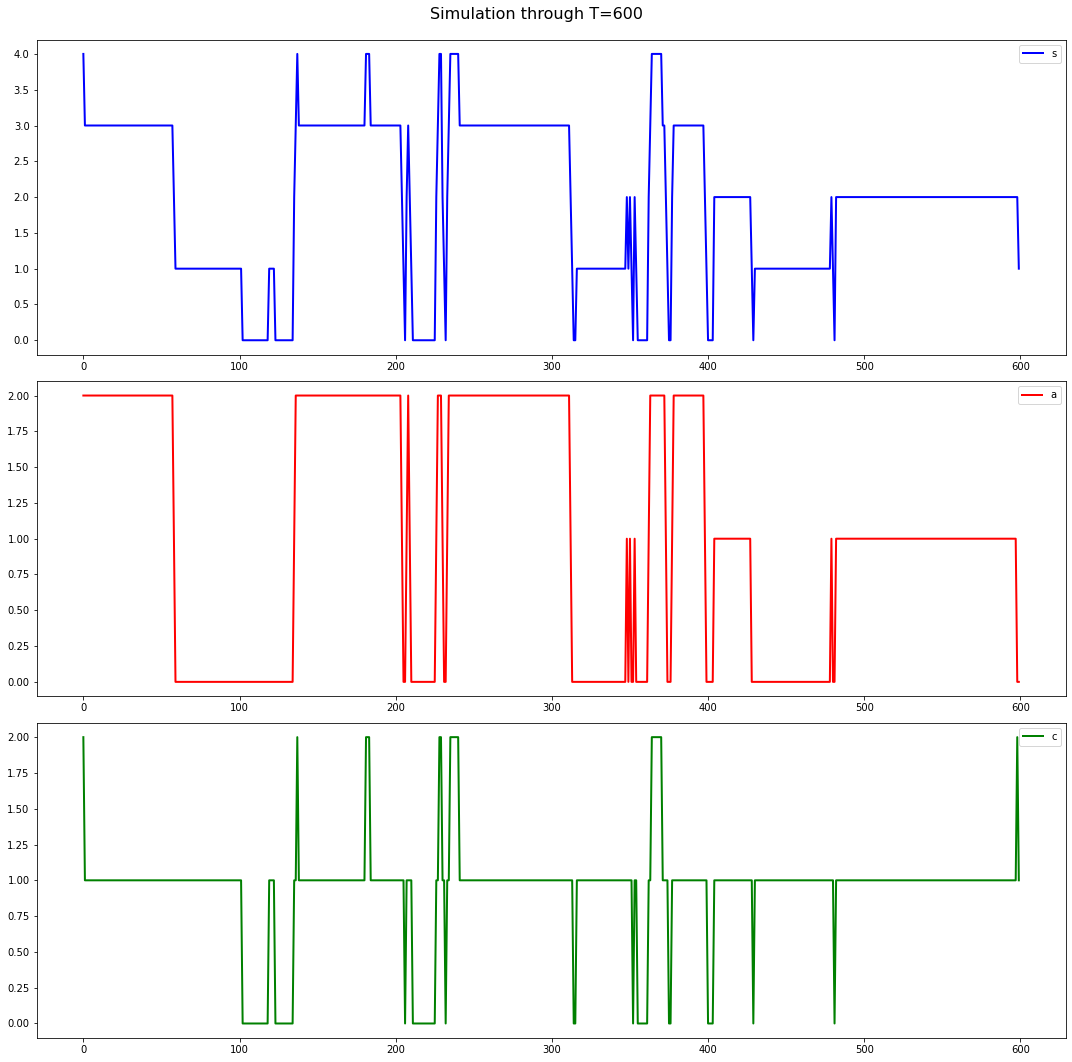

In [50]:
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
fig.tight_layout()

ax[0].plot(evolution_seac[:,0],lw=2, label="s", color='b')
ax[0].legend()
ax[1].plot(evolution_seac[:,2],lw=2, label="a", color='r')
ax[1].legend()
ax[2].plot(evolution_seac[:,3],lw=2, label="c", color='g')
ax[2].legend()

fig.suptitle('Simulation through T=600', size=16)
fig.tight_layout()
fig.subplots_adjust(top=0.95)

#### Question 8: Construct the transition probability and reward matrices between (s, e) and (s', e') that produces the highest expected discount rewards. (hint: you need to use the optimal policy)

In [51]:
Pt_se_df_optimal = Pt_se_df.copy()

In [52]:
Pt_se_df_optimal

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(1, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(2, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 1)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(3, 2)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(4, 0)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if policy_df.at[599,(s,e)] == 0:
            Pt_se_df_optimal.at[(s,e),(s_,e_)] = Pt_se_df_0.at[(s,e),(s_,e_)]
        if policy_df.at[599,(s,e)] == 1:
            Pt_se_df_optimal.at[(s,e),(s_,e_)] = Pt_se_df_1.at[(s,e),(s_,e_)]
        if policy_df.at[599,(s,e)] == 2:
            Pt_se_df_optimal.at[(s,e),(s_,e_)] = Pt_se_df_2.at[(s,e),(s_,e_)]

In [74]:
Pt_se_df_0

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(1, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(1, 1)",0.01,0,0.98,0,0,0.01,0,0,0,0,0,0
"(2, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(2, 1)",0.01,0,0.98,0,0,0.01,0,0,0,0,0,0
"(2, 2)",0.10,0,0.10,0,0,0.80,0,0,0,0,0,0
"(3, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0
"(3, 1)",0.01,0,0.98,0,0,0.01,0,0,0,0,0,0
"(3, 2)",0.10,0,0.10,0,0,0.80,0,0,0,0,0,0
"(4, 0)",0.80,0,0.10,0,0,0.10,0,0,0,0,0,0


In [54]:
Pt_se_df_optimal

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.80,0.00,0.10,0.00,0.00,0.10,0.0,0.00,0.00,0.0,0.0,0.00
"(1, 0)",0.80,0.00,0.10,0.00,0.00,0.10,0.0,0.00,0.00,0.0,0.0,0.00
"(1, 1)",0.01,0.00,0.98,0.00,0.00,0.01,0.0,0.00,0.00,0.0,0.0,0.00
"(2, 0)",0.00,0.80,0.00,0.00,0.10,0.00,0.0,0.00,0.10,0.0,0.0,0.00
"(2, 1)",0.00,0.01,0.00,0.00,0.98,0.00,0.0,0.00,0.01,0.0,0.0,0.00
"(2, 2)",0.00,0.10,0.00,0.00,0.10,0.00,0.0,0.00,0.80,0.0,0.0,0.00
"(3, 0)",0.00,0.00,0.00,0.80,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.10
"(3, 1)",0.00,0.00,0.00,0.01,0.00,0.00,0.0,0.98,0.00,0.0,0.0,0.01
"(3, 2)",0.00,0.00,0.00,0.10,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.80
"(4, 0)",0.00,0.00,0.00,0.80,0.00,0.00,0.0,0.10,0.00,0.0,0.0,0.10


In [55]:
R_se_df_optimal = Pt_se_df.copy()

In [56]:
for (s,e) in col_name:
    for(s_,e_) in col_name:
        if policy_df.at[599,(s,e)] == 0:
            R_se_df_optimal.at[(s,e),(s_,e_)] = R_se_df_0.at[(s,e),(s_,e_)]
        if policy_df.at[599,(s,e)] == 1:
            R_se_df_optimal.at[(s,e),(s_,e_)] = R_se_df_1.at[(s,e),(s_,e_)]
        if policy_df.at[599,(s,e)] == 2:
            R_se_df_optimal.at[(s,e),(s_,e_)] = R_se_df_2.at[(s,e),(s_,e_)]

In [57]:
R_se_df_optimal

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
"(0, 0)",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"(1, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(1, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(2, 2)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(3, 0)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(3, 1)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(3, 2)",0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147
"(4, 0)",1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612,1.098612


#### Question 9: Calculate the value function for the Markov process with rewards that produces the highest expected discount rewards. (hint: use the transition probability and reward matrices from the previous question). Does the value function matches reasonably the value function from the previous question? (hint: it should) (Example 2.4 - Markov Process with Rewards)

In [58]:
Pt_optimal = np.array(Pt_se_df_optimal)
R_optimal = np.array(R_se_df_optimal)

In [59]:
N,M = R_optimal.shape

q = np.zeros((N,1),dtype=np.float64)
for i in range(0,N):
    for j in range(0,N):
        q[i] += np.multiply(R_optimal[i,j],Pt_optimal[i,j])

v = np.zeros((N,T),dtype=np.float64)

for n in range(1,T):
    for i in range(0,N):
        v[i,n] = q[i] + np.matmul(Pt_optimal[i,:],v[:,n-1])

print(v.T)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.93147181e-01 6.93147181e-01 ... 1.09861229e+00
  1.09861229e+00 1.09861229e+00]
 [1.38629436e-01 8.31776617e-01 1.37936289e+00 ... 1.83230598e+00
  1.79581412e+00 2.11613156e+00]
 ...
 [3.99996821e+02 4.00689968e+02 4.02838902e+02 ... 4.02369154e+02
  4.04342966e+02 4.04757469e+02]
 [4.00672249e+02 4.01365396e+02 4.03514329e+02 ... 4.03044582e+02
  4.05018394e+02 4.05432897e+02]
 [4.01347676e+02 4.02040823e+02 4.04189757e+02 ... 4.03720010e+02
  4.05693822e+02 4.06108324e+02]]


In [60]:
value_df_optimal = pd.DataFrame(v.T, columns=col_name)

In [61]:
value_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.693147,0.693147,1.098612,1.098612,1.098612,1.386294,1.386294,1.386294,1.609438,1.609438,1.609438
2,0.179176,0.872323,1.383418,1.496156,1.790582,2.046817,1.901621,2.196047,2.386824,2.277075,2.484261,2.674506
3,0.486364,1.179511,2.071156,1.808746,2.480509,2.892325,2.377127,2.886980,3.274362,2.782592,3.292445,3.607437
4,0.885439,1.578587,2.756667,2.212243,3.168584,3.678639,2.789586,3.576549,4.084104,3.195051,3.982014,4.454135
...,...,...,...,...,...,...,...,...,...,...,...,...
595,399.037835,399.730982,401.879913,400.386605,402.447979,402.950033,401.004704,402.978522,403.393021,401.410170,403.383987,403.798487
596,399.713262,400.406410,402.555340,401.062033,403.123407,403.625460,401.680132,403.653949,404.068449,402.085597,404.059414,404.473914
597,400.388690,401.081837,403.230768,401.737460,403.798834,404.300888,402.355560,404.329377,404.743877,402.761025,404.734842,405.149342
598,401.064118,401.757265,403.906196,402.412888,404.474262,404.976316,403.030987,405.004805,405.419304,403.436452,405.410270,405.824769


In [62]:
value_df_optimal

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.098612,1.098612,1.098612
2,0.138629,0.831777,1.379363,1.386294,1.386294,1.386294,1.426841,1.390349,1.710666,1.832306,1.795814,2.116132
3,0.387469,1.080616,2.060172,1.668265,2.077140,2.283487,2.152831,2.090713,2.663717,2.558296,2.496179,3.069182
4,0.744341,1.437489,2.738825,2.031726,2.766188,3.139896,2.543748,2.789421,3.524390,2.949213,3.194886,3.929856
...,...,...,...,...,...,...,...,...,...,...,...,...
595,398.645966,399.339113,401.488047,399.994736,402.056108,402.558160,400.612834,402.586646,403.001149,401.018299,402.992111,403.406614
596,399.321393,400.014541,402.163474,400.670163,402.731536,403.233588,401.288262,403.262073,403.676576,401.693727,403.667539,404.082041
597,399.996821,400.689968,402.838902,401.345591,403.406963,403.909016,401.963689,403.937501,404.352004,402.369154,404.342966,404.757469
598,400.672249,401.365396,403.514329,402.021018,404.082391,404.584443,402.639117,404.612929,405.027432,403.044582,405.018394,405.432897


#### Question 10: Simulate the Markov process with rewards from the previous question for starting at each state pair (s, e). Compute the average discounted reward. Does it match reasonabily close to the value function in the previous question? (hint: it should)

In [132]:
#simulate 5000 times
n_sim = 5000
simulated_reward_df = pd.DataFrame(columns=col_name)
for i in range(n_sim):
    sim_reward_list = []
    for (s0, e0) in col_name:
        mkv = qe.MarkovChain(Pt_optimal, col_name)
        sim=mkv.simulate(T, init=(s0,e0))
        reward = 0
        for i in range(len(sim)-1):
            reward += R_se_df_optimal.at[tuple(sim[i]), tuple(sim[i+1])]
        sim_reward_list.append(reward)
    simulated_reward_df.loc[len(simulated_reward_df)] = sim_reward_list

In [133]:
simulated_reward_df #each row represents each simulation round with all initial states

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,401.411436,412.347531,391.748028,409.534289,400.339925,411.638744,401.687655,410.775698,371.082859,405.504652,420.454745,420.506861
1,396.613609,408.290791,415.000248,414.347754,372.090790,389.759268,422.482070,404.419590,421.095776,410.567234,400.955943,381.441501
2,417.197473,409.323737,394.584196,434.607458,370.181248,401.046624,403.098963,418.597318,407.950993,435.194286,421.200008,428.616163
3,392.937321,407.427745,397.005524,421.356356,411.953528,395.814142,390.046950,389.849949,428.380597,415.405713,373.803331,392.400522
4,395.578576,421.906706,412.463226,409.377941,417.027574,406.852381,398.756630,407.545528,419.630263,401.608437,422.337185,390.687981
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,396.507289,371.685325,416.569993,373.436431,407.257846,427.778131,405.060622,423.227333,394.964647,415.668381,421.383458,420.192077
4996,427.046418,436.791132,416.739892,407.309962,403.635762,402.849846,400.312823,416.452210,404.720824,381.978301,401.189421,386.581214
4997,413.863071,399.148544,420.219179,404.093343,414.909567,420.728876,433.377512,402.013902,404.969941,416.660674,416.098860,440.818681
4998,392.008608,375.817106,407.819659,433.925774,415.772613,403.400196,423.095999,392.663190,400.589042,398.992196,405.767320,410.279552


In [134]:
simulated_reward_df.mean(axis=0)

(0, 0)    401.375498
(1, 0)    401.895653
(1, 1)    404.023903
(2, 0)    402.619126
(2, 1)    404.865000
(2, 2)    405.071215
(3, 0)    403.239136
(3, 1)    405.293754
(3, 2)    405.838252
(4, 0)    403.494916
(4, 1)    405.812172
(4, 2)    406.366565
dtype: float64

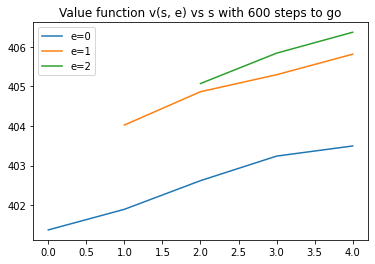

In [135]:
v_e0 = []
v_e1 = []
v_e2 = []
for (s,e) in col_name:
    if e == 0:
        v_e0.append((s, simulated_reward_df.mean(axis=0)[(s,e)]))
    if e == 1:
        v_e1.append((s, simulated_reward_df.mean(axis=0)[(s,e)]))
    if e == 2:
        v_e2.append((s, simulated_reward_df.mean(axis=0)[(s,e)]))

s_e0, v_e0 = zip(*v_e0)
s_e1, v_e1 = zip(*v_e1)
s_e2, v_e2 = zip(*v_e2)

plt.plot(s_e0, v_e0, label='e=0')
plt.plot(s_e1, v_e1, label='e=1')
plt.plot(s_e2, v_e2, label='e=2')
plt.legend()
plt.title('Value function v(s, e) vs s with 600 steps to go')
plt.show()


#### Question 11: Calculate the optimal policy based on the policy iteration approach. (See example 2.6 Markov Decision Process)

In [77]:
# initiate objects to store value function and decisions
v = np.zeros((N,T),dtype=np.float64)
d = np.zeros((N,T),dtype=np.int)
g = np.zeros((1,T),dtype=np.float64)

# initiate auxiliary variables
PP = np.zeros((N,N),dtype=np.float64)
qvec = np.zeros((N,1),dtype=np.float64)

# compute expected reward for each state
q = np.zeros((K,N,1),dtype=np.float64)
for i in range(0,N):
    for k in range(0,K):
        for j in range(0,M):
            q[k,i,0] = q[k,i,0] + RR[k,i,j]*P[k,i,j]

for n in range(1,T):
    # policy improvement (assume v=0)
    for i in range(0,N):
        rhs = np.zeros((1,K),dtype=np.float64)
        for k in range(0,K):
            rhs[0][k] = q[k][i][0] + np.matmul(P[k,i,:],v[:,n-1]) 
        v[i,n] = max(rhs[0])
        d[i,n] = np.argmax(rhs[0])
    # value determination
    for i in range(0,N):
        PP[i,:] = P[d[i,n],i,:]
    
    A = np.concatenate((np.identity(N)-PP,np.ones((N,1))),axis=1)
    A = np.delete(A,N-1,1)
    
    for i in range(0,N):
        qvec[i,0] = q[d[i,n],i,0]
    tmp = np.matmul(np.linalg.inv(A),qvec)
    g = tmp[N-1]
    tmp[N-1] = 0
    # iteration
    v[:,n] = tmp.T
v = v.T
d = d.T
g = g.T

In [78]:
v

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-4.17286659, -3.47971941, -1.1431708 , ..., -2.56342867,
        -0.22688007,  0.        ],
       [-4.64287022, -3.94972303, -1.61317443, ..., -2.22727828,
        -0.10739805,  0.        ],
       ...,
       [-4.76065325, -4.06750607, -1.91857621, ..., -2.38831785,
        -0.41449881,  0.        ],
       [-4.76065325, -4.06750607, -1.91857621, ..., -2.38831785,
        -0.41449881,  0.        ],
       [-4.76065325, -4.06750607, -1.91857621, ..., -2.38831785,
        -0.41449881,  0.        ]])

In [79]:
d

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 2, 1],
       ...,
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2]])

In [80]:
value_df = pd.DataFrame(v, columns=col_name)

In [81]:
value_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,-4.172867,-3.479719,-1.143171,-3.074254,-0.737706,-0.510826,-2.786572,-0.450024,-0.223144,-2.563429,-0.226880,0.0
2,-4.642870,-3.949723,-1.613174,-3.256576,-0.920027,-0.980829,-2.851111,-0.514562,-0.287682,-2.227278,-0.107398,0.0
3,-4.904494,-4.355188,-2.018640,-3.662041,-1.325492,-1.098612,-2.968894,-0.632345,-0.693147,-2.563429,-0.226880,0.0
4,-4.422204,-3.729057,-1.392508,-3.662041,-0.868586,-0.760163,-2.968894,-0.632345,-0.405465,-2.563429,-0.226880,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
595,-4.760653,-4.067506,-1.918576,-3.411883,-1.350508,-0.848454,-2.793783,-0.819964,-0.405465,-2.388318,-0.414499,0.0
596,-4.760653,-4.067506,-1.918576,-3.411883,-1.350508,-0.848454,-2.793783,-0.819964,-0.405465,-2.388318,-0.414499,0.0
597,-4.760653,-4.067506,-1.918576,-3.411883,-1.350508,-0.848454,-2.793783,-0.819964,-0.405465,-2.388318,-0.414499,0.0
598,-4.760653,-4.067506,-1.918576,-3.411883,-1.350508,-0.848454,-2.793783,-0.819964,-0.405465,-2.388318,-0.414499,0.0


In [82]:
policy_df = pd.DataFrame(d, columns=col_name)

In [83]:
policy_df

,"(0, 0)","(1, 0)","(1, 1)","(2, 0)","(2, 1)","(2, 2)","(3, 0)","(3, 1)","(3, 2)","(4, 0)","(4, 1)","(4, 2)"
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,1,0,1,1,1,2,2,1
3,0,1,1,1,1,1,2,2,1,2,2,2
4,0,0,0,2,1,1,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,1,1,1,2,2,2,2,2,2
596,0,0,0,1,1,1,2,2,2,2,2,2
597,0,0,0,1,1,1,2,2,2,2,2,2
598,0,0,0,1,1,1,2,2,2,2,2,2
